In [52]:
# Simple CA simulator in Python
#
# *** Hosts & Pathogens ***
#
# Copyright 2008-2012 Hiroki Sayama
# sayama@binghamton.edu

# Modified to run with Python 3

import matplotlib.pyplot as plt
# matplotlib.use('TkAgg')
plt.style.use('ggplot')

import pylab as PL
import random as RD
import scipy as SP
import numpy as np


RD.seed()

width = 50
height = 50
initProb = 0.01
infectionRate = 0.85
regrowthRate = 0.15

def init():
    global time, config, nextConfig

    time = 0
    
    config = SP.zeros([height, width])
    for x in range(width):
        for y in range(height):
            if RD.random() < initProb:
                state = 2
            else:
                state = 1
            config[y, x] = state

    nextConfig = SP.zeros([height, width])

def draw():
    PL.cla()
    PL.pcolor(config, vmin = 0, vmax = 2, cmap = PL.cm.jet)
    PL.axis('image')
    PL.title('t = ' + str(time))

def step():
    global time, config, nextConfig

    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == 0:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == 1:
                            if RD.random() < regrowthRate:
                                state = 1
            elif state == 1:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == 2:
                            if RD.random() < infectionRate:
                                state = 2
            else:
                state = 0

            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config

# import pycxsimulator
# pycxsimulator.GUI().start(func=[init,draw,step])

In [53]:
population_healthy = []
population_infected = []
T = 50

init()
# draw()
for i in range(T):
    unique, counts = np.unique(config, return_counts=True)
    if len(unique) > 1:
        population_healthy.append(counts[0])
        population_infected.append(counts[1])
    elif unique[0] == 1.:
        population_healthy.append(counts[0])
        population_infected.append(0)
    else:
        population_healthy.append(0)
        population_infected.append(counts[1])
    step()
# draw()

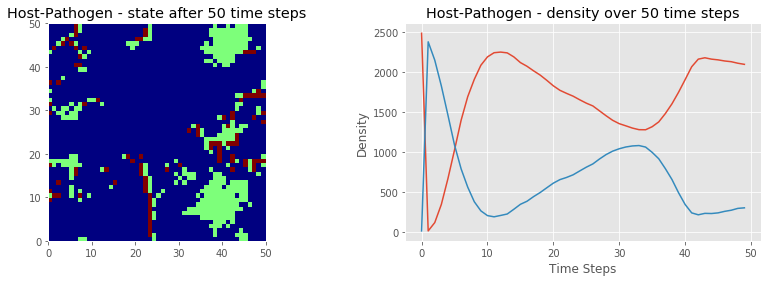

In [57]:
plt.figure(figsize=(14, 4))
plt.subplot(1,2,1) 
draw()
plt.title("Host-Pathogen - state after {t} time steps".format(t=T))

plt.subplot(1,2,2) 

plt.plot(range(T), population_healthy, label="Healthy")
plt.plot(range(T), population_infected, label="Infected")
plt.title("Host-Pathogen - density over {t} time steps".format(t=T))
plt.xlabel("Time Steps")
plt.ylabel("Density")
plt.show()